In [1]:
from os import listdir
from os.path import isfile, join
import json
import pandas as pd
import re
import nltk
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize, sent_tokenize

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
mypath="./json/pdf_json/"
files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [6]:
def extract_text(filename,output_as_list=False):
    '''
    Extract the text from the file name (json file) and
    index the content from paper_id, title, abstract and body_text fields
    Retuns - if output_as_list = True
                list of all the above values,
             else
                text of title, abstract and bodt_text
    '''

    file = open(filename)
    body_text = ""
    abstract = ""
    title = ""
    paper_id = ""

    paper_content = json.load(file)

    #get the paper_id
    if 'paper_id' in paper_content:
        paper_id = paper_content['paper_id']
    #get the title, if available
    if 'title' in paper_content['metadata']:
        title = paper_content['metadata']['title']
    #get abstract.text, if available
    if 'abstract' in paper_content:
        for abs in paper_content['abstract']:
            abstract = abstract + abs['text']
    if 'body_text' in paper_content:
        for bt in paper_content['body_text']:
            body_text = body_text + bt['text']


    if output_as_list:
            return [paper_id,title.lower(),abstract.lower(),body_text.lower()]
    else:
        return (title + ' ' + abstract + ' ' + body_text + ' ').lower()



In [7]:
df=pd.DataFrame({'paper_id':[],'title':[],'abstract':[],'body_text':[]})
for f in files:
    '''
    Extracting text from the json files and storing them in a pandas dataframe
    Columns include paper_id, title , abstract, body_text
    Names are self explainatory
    Finally I create a new column 'text' which contains text from both abstract and body which forms aur corpus
    '''
    ls = extract_text(mypath+f,output_as_list=True)
    dict ={'paper_id':ls[0],'title':ls[1],'abstract':ls[2],'body_text':ls[3]}
    df = df.append(dict,ignore_index=True)
df["text"] = df["abstract"] + df["body_text"]

In [18]:
text = re.sub(r'http\S+', 'url',df['body_text'][17], flags=re.MULTILINE)
text

'the effect on the cell membrane of inclusions (membrane proteins, antimicrobial peptides etc.) is a highly active field of study in biophysics [1] . a very powerful principle employed in describing the interaction between proteins and membranes is that of hydrophobic matching [2, 3] . it states that proteins with a given hydrophobic length insert preferentially into membranes with a similar hydrophobic thickness [4] .many studies of the interaction used as inclusion the antimicrobial peptide (amp) gramicidin a (grama), which is known [5, 6] to deform (stretch or compress) host membranes to bring them closer to its own hydrophobic length, so the hydrophobic matching mechanism is likely relevant. this perturbation of the membrane profile induces a repulsive interaction between the grama pores in bilayers with various compositions [7] that can be explained based on a complete elastic model [8] .this large-scale description raises however fundamental questions about the "microscopic effec

In [21]:
ls=[]
for i in df['body_text'][17].split():
    if '@' not in i:
        ls.append(i)
    else:
        ls.append('email')
txt=' '.join(ls)
txt
    

'the effect on the cell membrane of inclusions (membrane proteins, antimicrobial peptides etc.) is a highly active field of study in biophysics [1] . a very powerful principle employed in describing the interaction between proteins and membranes is that of hydrophobic matching [2, 3] . it states that proteins with a given hydrophobic length insert preferentially into membranes with a similar hydrophobic thickness [4] .many studies of the interaction used as inclusion the antimicrobial peptide (amp) gramicidin a (grama), which is known [5, 6] to deform (stretch or compress) host membranes to bring them closer to its own hydrophobic length, so the hydrophobic matching mechanism is likely relevant. this perturbation of the membrane profile induces a repulsive interaction between the grama pores in bilayers with various compositions [7] that can be explained based on a complete elastic model [8] .this large-scale description raises however fundamental questions about the "microscopic effec

In [125]:
for i,j in df['body_text'].iteritems():
    lst = re.findall('http\S+', j)
    if len(lst)!=0:
        print(i,lst)

17 ['https://doi.org/10.1140/epje/i2018-11644-5']
18 ['http://plasm', 'http://plasm']
22 ['http://www.accessdata.fda.gov/scripts/cdrh/']
33 ['https://']
34 ['https://doi.org/10.1016/j.jinf.2020.03.052']
37 ['https://www.medrxiv.org/content/10.1101/2020.04.23.20076042v1).', 'https://www.preprints.org/manuscript/202002.0315/v1).']
40 ['https://doi.org/10.1101/2020.01.10.901801', 'https://doi.org/10.1101/2020.01.10.901801', 'https://doi.org/10.1101/2020.01.10.901801', 'https://doi.org/10.1101/2020.01.10.901801', 'https://doi.org/10.1101/2020.01.10.901801', 'https://doi.org/10.1101/2020.01.10.901801', 'https://doi.org/10.1101/2020.01.10.901801', 'https://doi.org/10.1101/2020.01.10.901801', 'https://doi.org/10.1101/2020.01.10.901801', 'https://doi.org/10.1101/2020.01.10.901801', 'https://doi.org/10.1101/2020.01.10.901801', 'https://doi.org/10.1101/2020.01.10.901801']
46 ['http://www.paeds.org.au/', 'http://www.paeds.org.au/covid-19-kawasaki-disease-kd-andpims-ts-children']
47 ['https://www.

In [124]:
for i,j in df['body_text'].iteritems():
    lst = re.findall('\S+@\S+', j)
    if len(lst)!=0:
        print(i,lst)
    

17 ['doru.constantin@u-psud.fr']
146 ['"@user', '"@user']
166 ['judit.wefer@cmm.ki.se', 'stasa@hol.gr', 'tgartner@vub.ac.be', 'rnsr@studmed.au.dk']
167 ['pedchung@sanggyepaik.ac.kr']
215 ['gain@1-10,']
216 ['raul.andino@ucsf.edu', 'alexander.bukreyev@utmb.edu', '(abukreye@utmb.edu).all']
222 ['(@jcdatrasto:']
227 ['jborn@ethz.ch']
304 ['journals.permis-sions@oup.com']
322 ['jamie.voyles@gmail.com']
349 ['cpu@2.20']
367 ['ndcg@10', 'ndcg@10', 'p@5', 'top@10']
383 ['adriana.miu@utsouthwestern.edu.we']
387 ['gps@hmti.ac.by;']
430 ['https://medium.com/@peckshield/bzx-hack-full-disclosure-with-detailed-profit-analysis-e6b1fa9b18fc', 'analysis).https://medium.com/@peckshield/bzx-hack-ii-full-disclosure-with-detailed-profit-analysis-8126eecc1360']
456 ['(ucch-covid-help@uke.de).']
529 ['sebasiglo@gmail.com', 'siglesias@unprg.edu.pe']
553 ['seren@ctif', 'seren@ctif']
628 ['dhelbing@ethz.ch']
644 ['(kamran@bluedot.global).', '(shengjie.lai@soton.ac.uk).', '(shengjie.lai@soton.ac.uk)..']
690 ['e

In [8]:
def remove_citations(txt):
    #removes citations like '[1]' from the text
    return re.sub(r'\[.*?\]', '', txt)

In [9]:
def remove_parenthesis(txt):
    #removes parenthesis and the text contained them them
    return re.sub(r'\(.*?\)', '', txt)

In [10]:
def remove_url(txt):
    #removes url of the form http:/..
    return re.sub(r'http\S+', '', txt)

In [11]:
def remove_email(txt):
    #removes email or refrences of the form abc@xyv , nlp@gmail.com
    return re.sub(r'\S+@\S+', '', txt)

In [12]:
def remove_special(txt):
    #removes special charecters like #,$,_,@ etc.except . 
    return re.sub(r'[^.a-zA-Z0-9\s]', '', txt)

In [13]:
def remove_numbers(txt):
    #removes numbers
    return re.sub(r'\b[0-9]+\b', '', txt)

In [14]:
def remove_single_letters(txt):
    #removes single/isolated alphabets
    return re.sub(r'\s+(?![iIaA])[a-zA-Z]\s+','',txt)

In [15]:
def remove_extra_dots(txt):
    #removes unwanted dots. Necessary due to previous preprocessing steps.
    temp = re.sub(r'\.\s+(?=\.)', '', txt)
    return re.sub(r'\.\.', '', temp)

In [16]:
def remove_extra_spaces(txt):
    #removes extra spaces. Necessary due to previous preprocessing steps.
    return re.sub(r'\s{2,}', ' ', txt)

In [17]:
stop_words = set(stopwords.words('english'))  
def remove_stopwords(txt):
    #removes common english stopwords
    tokens = word_tokenize(txt)  
    temp = [w for w in tokens if not w in stop_words]
    prc = ' '.join(temp)
    return prc

In [18]:
#Important to maintain chronology
df['text'] = df['text'].apply(remove_citations)
df['text'] = df['text'].apply(remove_parenthesis)
df['text'] = df['text'].apply(remove_url)
df['text'] = df['text'].apply(remove_email)
df['text'] = df['text'].apply(remove_special)
df['text'] = df['text'].apply(remove_numbers)
df['text'] = df['text'].apply(remove_single_letters)
df['text'] = df['text'].apply(remove_extra_dots)
df['text'] = df['text'].apply(remove_extra_spaces)
df['text'] = df['text'].apply(remove_stopwords)

In [19]:
df['text']

0        according current live statistics time editing...
1        feline infectious peritonitis virus positive c...
2        background amplification viral ribonucleic aci...
3        protect highrisk patient populations dominant ...
4        approach . nm shape conformal circuit tuned mi...
                               ...                        
56623    restrictions movement planned place turnpikes ...
56624    working group reported patients typecovid19 di...
56625    isp iw i1teiw i1 figure s1 unrooted maximum li...
56626    words text words tables figures references abs...
56627    pandemic influenza considered catastrophic glo...
Name: text, Length: 56628, dtype: object

In [22]:
df.to_csv('json/corpus.csv')

In [20]:
df

,paper_id,title,abstract,body_text,text
0,0000028b5cc154f68b8a269f6578f21e31f62977,"""multi-faceted"" covid-19: russian experience",,according to current live statistics at the ti...,according current live statistics time editing...
1,0001418189999fea7f7cbe3e82703d71c85a6fe5,absence of surface expression of feline infect...,feline infectious peritonitis virus (fipv) pos...,feline infectious peritonitis (fip) is a fatal...,feline infectious peritonitis virus positive c...
2,00033d5a12240a8684cfe943954132b43434cf48,detection of severe acute respiratory syndrome...,background: amplification of viral ribonucleic...,severe acute respiratory syndrome coronavirus ...,background amplification viral ribonucleic aci...
3,0003793cf9e709bc2b9d0c8111186f78fb73fc04,title: rethinking high-risk groups in covid-19,,how do we protect our 'high-risk' patient popu...,protect highrisk patient populations dominant ...
4,000379d7a7f37a2ccb978862b9f2016bd03259ea,sciencedirect sciencedirect effect of nanomate...,approach. the nm shape in the conformal circui...,integration of functional electronic devices o...,approach . nm shape conformal circuit tuned mi...
...,...,...,...,...,...
56623,6ffe6065ae127a7de07aa2c1e1b09a0284558da4,journal pre-proof a journal in a plague year,,"restrictions to movement planned ""to place tur...",restrictions movement planned place turnpikes ...
56624,6ffea1dd16c0370d9f660f7783e6a9cd84f80360,accepted article serum kl-6 can distinguish be...,,working group reported that patients with type...,working group reported patients typecovid19 di...
56625,6ffeb9eec90b0ff9624ba2ba11ff573b854b9524,the evolution of animal argonautes: evidence f...,,is c -p iw i1 p te -p iw i1 figure s1 : unroot...,isp iw i1teiw i1 figure s1 unrooted maximum li...
56626,6fffd29da38651e79d21fe3d018164d10d336653,smoking is associated with covid-19 progressio...,223 words text: 996 words tables: 1 figures: 1...,"covid-19, the coronavirus-transmitted infectio...",words text words tables figures references abs...


The preprocessing done on this corpus includes the following: 
The text body contains citations. For the language model citations are unnecessary, so I have removed them. The other uncessary things contained in the text body of the corpus are urls and email adresses (they add no meaning to the sentence), thus I have removed them from the corpus. Also, the text contained within in the parenthesis usually contain explaination or afterthought. The sentences hold full meaning without them and so I have removed them as well. Next I have removed special charecters (doesn't change the context on removal and it also helps to reduce certain words like covid-19 to covid19 , sar_2 to sar2), numbers (donot need them and keeping numbers will unnecessarily increase our vocabulary count) and single alphabets (this corpus contain certain single alphabets which hold very little meaning in the context, though it also removes words like I and a but later I have also removed stopwords, so this would have got removed anyways) from the corpus. Next I have removed extra dots and spaces which mainly happens as an unwanted byproduct of the preprocessing steps which I have done earlier. Finally I remove all the stopwords (using the nltk library). Point to be noted here is that order in which these preprocessing steps take place is extremely important as juggling the order will result in us getting undesired result (like removing special charecters before removing email or urls will result in them not being detected at all and adding meaningless words to the vocabulary).

In [165]:
corpus = df['text'].to_list()
tokens = word_tokenize(' '.join(corpus))
sent_token = sent_tokenize(' '.join(corpus))
word_count = len(tokens)
vocab_count = len(set(tokens))
sent_count =len(sent_token) 


In [167]:
print('Size of the corpus in terms of number of words:', word_count)
print('Size of the corpus in terms of number of sentences:', sent_count)
print('Number of words in the vocabulary:', vocab_count)

Size of the corpus in terms of number of words: 129754136
Size of the corpus in terms of number of sentences: 8120188
Number of words in the vocabulary: 2399389


In [166]:

tokens = []
vocab = []
for i in corpus:
    t = len(word_tokenize(i))
    tokens.append(t)
    v = len(sent_tokenize(i))
    vocab.append(v)
    
    

Heap's law is given by : <br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**V = k$T^{b}$**

Converting to log scales,<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**log(V) = log(K) +  b*log(T)**

In [170]:
log_vocab=np.log(vocab)
log_tokens=np.log(tokens)

C:\Users\risha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\risha\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [173]:
log_tokens=[math.log10(i) if i!=0 else 0 for i in tokens]
log_vocab=[math.log10(i) if i!=0 else 0 for i in vocab]

In [188]:
slope, intercept, r_value, p_value, std_err = linregress(log_tokens, log_vocab)
print('Best estimate of  log(k) = ', np.round(intercept,3),' and b = ', np.round(slope,3))

Best estimate of  log(k) =  -1.18  and b =  0.989


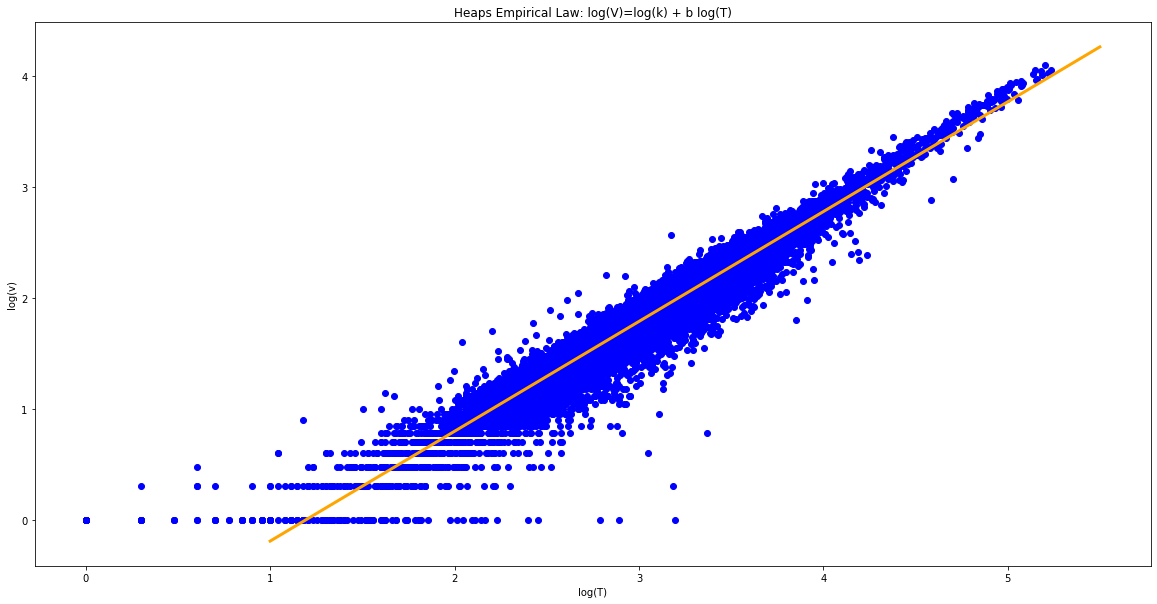

In [190]:
x = np.linspace(1, 5.5, num=5)
y = intercept + slope*x


plt.figure(figsize = (20,10))
plt.scatter(log_tokens, log_vocab,  color='blue')
plt.plot(x, y, color='orange', linewidth=3)

plt.xlabel('log(T)')  
plt.ylabel('log(v)')
title='Heaps Empirical Law: log(V)=log(k) + b log(T)'
plt.title(title) 

plt.show()

In [155]:
df['text']

0        recent outbreak coronavirus originating decemb...
1        recent outbreak coronavirus originating decemb...
2        recent outbreak coronavirus originating decemb...
3        recent outbreak coronavirus originating decemb...
4        recent outbreak coronavirus originating decemb...
                               ...                        
56623    recent outbreak coronavirus originating decemb...
56624    recent outbreak coronavirus originating decemb...
56625    recent outbreak coronavirus originating decemb...
56626    recent outbreak coronavirus originating decemb...
56627    recent outbreak coronavirus originating decemb...
Name: text, Length: 56628, dtype: object

In [110]:
txt = re.sub(r'\[.*?\]', '', df['body_text'][451])

In [111]:
txt=re.sub(r'\(.*?\)','',txt)

In [112]:
txt = re.sub(r'[^.a-zA-Z0-9\s]','',txt) 

In [113]:
txt = re.sub(r'\b[0-9]+\b', '', txt)

In [116]:
txt = re.sub(r'\.\s+(?=\.)', '', txt)

In [119]:
txt = re.sub(r'\.\.', '', txt)

In [120]:
txt

'the recent outbreak of coronavirus  originating in december  from wuhan  has infected over ten million people and has resulted in more than  deaths worldwide. early estimates have put the global economic costs of the pandemic at around . trillion.  given its immense human and economic impacts the covid19 outbreak has spurred a deluge of news and opinions. it has also triggered government policy responses such as mandatory closures and lockdowns. major events like the pandemic often overshadow all other events in the media  . a consistent influx of pandemicrelated news can cause anxiety among investors influencing their investment decisions  . such sentiment related influences have a significant impact on trading in financial markets  . similarly restrictive government policies can cause uncertainty which may stimulate portfolio reconstructions and abnormal trading activity  and destabilize the markets  .liquidity and stability are important features of financial markets.  these factor